In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import math
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
#This list goes up to games released 2020 and below, missing data for 2021 and 2022 fiscal years

In [3]:
df=pd.read_csv("Video_Games.csv")

In [4]:
vgsales = pd.DataFrame(df, columns=["Name", "Platform", "Year_of_Release", "Genre", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score", "Critic_Count", "User_Count", "Developer", "Rating"])

In [5]:
vgsales

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  \
0          Nintendo     41.36     28.96      3.77         8.45          76.0   
1          Nintendo     29.08      3.58      6.81         0.77           NaN   
2          Nintendo     15.68     12.76      3.79         3.29          82.0   
3          Nintendo     15.61     10.93      3.28         2.95          80.0   
4          Nintendo     11.27      8.89     10.22         1.00           NaN   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00           NaN   
16715   Codemasters      0.00      0.01      0.00         0.00           NaN   
16716  Idea Factory      0.00      0.00      0.01         0.00           NaN   
16717       Wanadoo      0.01      0.00      0.00         0.00           NaN   
16718    Tecmo Koei      0.00      0.00      0.01         0.00           NaN   

       Critic_Count  User_Count Developer Rating  
0              51.0       322.0  Nintendo      E  
1               NaN         NaN       NaN    NaN  
2              73.0       709.0  Nintendo      E  
3              73.0       192.0  Nintendo      E  
4               NaN         NaN       NaN    NaN  
...             ...         ...       ...    ...  
16714           NaN         NaN       NaN    NaN  
16715           NaN         NaN       NaN    NaN  
16716           NaN         NaN       NaN    NaN  
16717           NaN         NaN       NaN    NaN  
16718           NaN         NaN       NaN    NaN  

[16719 rows x 14 columns]

In [6]:
new_df = vgsales.loc[vgsales['Year_of_Release'] == 1985]

In [7]:
new_df

Name Platform  Year_of_Release  \
1                        Super Mario Bros.      NES           1985.0   
374                                Kung Fu      NES           1985.0   
869                                 Soccer      NES           1985.0   
1262                           Ice Climber      NES           1985.0   
1482                              Gyromite      NES           1985.0   
1971           Tag Team Match M.U.S.C.L.E.      NES           1985.0   
2011                             Bomberman      NES           1985.0   
2062                                  1942      NES           1985.0   
2252                         Balloon Fight      NES           1985.0   
3904                         Wrecking Crew      NES           1985.0   
4296                          Ghostbusters     2600           1985.0   
4709                               Dig Dug      NES           1985.0   
14472                            Alter Ego       PC           1985.0   
15959  Strongest Tokyo University Shogi DS       DS           1985.0   

            Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
1        Platform            Nintendo     29.08      3.58      6.81   
374        Action            Nintendo      1.64      0.38      1.42   
869        Sports            Nintendo      0.18      0.23      1.53   
1262     Platform            Nintendo      0.46      0.10      0.92   
1482       Puzzle            Nintendo      0.73      0.16      0.40   
1971     Fighting  Namco Bandai Games      0.00      0.00      1.05   
2011       Puzzle         Hudson Soft      0.18      0.00      0.85   
2062      Shooter              Capcom      0.65      0.14      0.21   
2252     Platform            Nintendo      0.39      0.09      0.43   
3904     Platform            Nintendo      0.00      0.00      0.51   
4296       Puzzle          Activision      0.42      0.03      0.00   
4709       Puzzle  Namco Bandai Games      0.00      0.00      0.41   
14472  Simulation          Activision      0.00      0.03      0.00   
15959      Action               Mycom      0.00      0.00      0.02   

       Other_Sales  Critic_Score  Critic_Count  User_Count  \
1             0.77           NaN           NaN         NaN   
374           0.06           NaN           NaN         NaN   
869           0.02           NaN           NaN         NaN   
1262          0.02           NaN           NaN         NaN   
1482          0.03           NaN           NaN         NaN   
1971          0.00           NaN           NaN         NaN   
2011          0.00           NaN           NaN         NaN   
2062          0.00           NaN           NaN         NaN   
2252          0.01           NaN           NaN         NaN   
3904          0.00           NaN           NaN         NaN   
4296          0.00           NaN           NaN         NaN   
4709          0.00           NaN           NaN         NaN   
14472         0.01          59.0           9.0        19.0   
15959         0.00           NaN           NaN         NaN   

                         Developer Rating  
1                              NaN    NaN  
374                            NaN    NaN  
869                            NaN    NaN  
1262                           NaN    NaN  
1482                           NaN    NaN  
1971                           NaN    NaN  
2011                           NaN    NaN  
2062                           NaN    NaN  
2252                           NaN    NaN  
3904                           NaN    NaN  
4296                           NaN    NaN  
4709                           NaN    NaN  
14472  Viva Media, Viva Media, LLC      T  
15959                          NaN    NaN

In [8]:
df_1985 = new_df[new_df.Name != "Strongest Tokyo University Shogi DS"]

In [9]:
df_1985

Name Platform  Year_of_Release       Genre  \
1                Super Mario Bros.      NES           1985.0    Platform   
374                        Kung Fu      NES           1985.0      Action   
869                         Soccer      NES           1985.0      Sports   
1262                   Ice Climber      NES           1985.0    Platform   
1482                      Gyromite      NES           1985.0      Puzzle   
1971   Tag Team Match M.U.S.C.L.E.      NES           1985.0    Fighting   
2011                     Bomberman      NES           1985.0      Puzzle   
2062                          1942      NES           1985.0     Shooter   
2252                 Balloon Fight      NES           1985.0    Platform   
3904                 Wrecking Crew      NES           1985.0    Platform   
4296                  Ghostbusters     2600           1985.0      Puzzle   
4709                       Dig Dug      NES           1985.0      Puzzle   
14472                    Alter Ego       PC           1985.0  Simulation   

                Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
1                Nintendo     29.08      3.58      6.81         0.77   
374              Nintendo      1.64      0.38      1.42         0.06   
869              Nintendo      0.18      0.23      1.53         0.02   
1262             Nintendo      0.46      0.10      0.92         0.02   
1482             Nintendo      0.73      0.16      0.40         0.03   
1971   Namco Bandai Games      0.00      0.00      1.05         0.00   
2011          Hudson Soft      0.18      0.00      0.85         0.00   
2062               Capcom      0.65      0.14      0.21         0.00   
2252             Nintendo      0.39      0.09      0.43         0.01   
3904             Nintendo      0.00      0.00      0.51         0.00   
4296           Activision      0.42      0.03      0.00         0.00   
4709   Namco Bandai Games      0.00      0.00      0.41         0.00   
14472          Activision      0.00      0.03      0.00         0.01   

       Critic_Score  Critic_Count  User_Count                    Developer  \
1               NaN           NaN         NaN                          NaN   
374             NaN           NaN         NaN                          NaN   
869             NaN           NaN         NaN                          NaN   
1262            NaN           NaN         NaN                          NaN   
1482            NaN           NaN         NaN                          NaN   
1971            NaN           NaN         NaN                          NaN   
2011            NaN           NaN         NaN                          NaN   
2062            NaN           NaN         NaN                          NaN   
2252            NaN           NaN         NaN                          NaN   
3904            NaN           NaN         NaN                          NaN   
4296            NaN           NaN         NaN                          NaN   
4709            NaN           NaN         NaN                          NaN   
14472          59.0           9.0        19.0  Viva Media, Viva Media, LLC   

      Rating  
1        NaN  
374      NaN  
869      NaN  
1262     NaN  
1482     NaN  
1971     NaN  
2011     NaN  
2062     NaN  
2252     NaN  
3904     NaN  
4296     NaN  
4709     NaN  
14472      T

In [10]:
df_1986 = vgsales.loc[vgsales['Year_of_Release'] == 1986]

In [11]:
df_1986

Name Platform  \
124                                 The Legend of Zelda      NES   
453                              World Class Track Meet      NES   
550                                             Metroid      NES   
574                  Super Mario Bros.: The Lost Levels      NES   
615                                      Dragon Warrior      NES   
740                           Pro Yakyuu Family Stadium      NES   
870                                           Rad Racer      NES   
997                                          Kid Icarus      NES   
1121                                  Ghosts 'n Goblins      NES   
1260  Ninja Hattori Kun: Ninja wa Shuugyou Degogiru ...      NES   
1424                                            Gradius      NES   
1628                                        Castlevania      NES   
1681                                            TwinBee      NES   
1682                   Ganbare Goemon! Karakuri Douchuu      NES   
1768                                           Doraemon      NES   
1790                                           Commando      NES   
1973                                   Adventure Island      NES   
2143                                       Star Soldier      NES   
3513                     The Mysterious Murasame Castle      NES   
5065                                            Solaris     2600   
5935                                  RealSports Boxing     2600   

      Year_of_Release         Genre                     Publisher  NA_Sales  \
124            1986.0        Action                      Nintendo      3.74   
453            1986.0        Sports            Namco Bandai Games      1.92   
550            1986.0        Action                      Nintendo      1.33   
574            1986.0      Platform                      Nintendo      0.00   
615            1986.0  Role-Playing                        Capcom      0.49   
740            1986.0        Sports            Namco Bandai Games      0.15   
870            1986.0        Racing                      Nintendo      1.13   
997            1986.0      Platform                      Nintendo      0.53   
1121           1986.0        Action                        Capcom      0.74   
1260           1986.0      Platform                   Hudson Soft      0.00   
1424           1986.0       Shooter  Konami Digital Entertainment      0.27   
1628           1986.0      Platform  Konami Digital Entertainment      0.54   
1681           1986.0       Shooter  Konami Digital Entertainment      0.00   
1682           1986.0      Platform  Konami Digital Entertainment      0.00   
1768           1986.0        Action                   Hudson Soft      0.00   
1790           1986.0        Action                        Capcom      0.71   
1973           1986.0      Platform                   Hudson Soft      0.00   
2143           1986.0       Shooter                   Hudson Soft      0.32   
3513           1986.0        Action                      Nintendo      0.00   
5065           1986.0       Shooter                         Atari      0.35   
5935           1986.0        Sports                         Atari      0.28   

      EU_Sales  JP_Sales  Other_Sales  Critic_Score  Critic_Count  User_Count  \
124       0.93      1.69         0.14           NaN           NaN         NaN   
453       0.45      0.64         0.07           NaN           NaN         NaN   
550       0.31      1.04         0.05           NaN           NaN         NaN   
574       0.00      2.65         0.00           NaN           NaN         NaN   
615       0.00      0.52         1.51           NaN           NaN         NaN   
740       0.00      2.05         0.00           NaN           NaN         NaN   
870       0.37      0.41         0.05           NaN           NaN         NaN   
997       0.12      1.09         0.02           NaN           NaN         NaN   
1121      0.26      0.61         0.03           NaN           NaN         NaN   
1260 

In [12]:
df_1987 = vgsales.loc[vgsales['Year_of_Release'] == 1987]

In [13]:
df_1987

Name Platform  \
252                  Zelda II: The Adventure of Link      NES   
467                         Mike Tyson's Punch-Out!!      NES   
602                                Dragon Warrior II      NES   
655                                    Pro Wrestling      NES   
765                                       Volleyball      NES   
1355                   Pro Yakyuu Family Stadium '87      NES   
1589   Gegege no Kitarou 2: Youkai Gundan no Chousen      NES   
2221                   Castlevania II: Simon's Quest      NES   
2461                                   Final Fantasy      NES   
2539                                        Mega Man      NES   
3111                                  Kung-Fu Master     2600   
4172                                        Commando     2600   
4352                                     Defender II     2600   
6557                                   Desert Falcon     2600   
11748                                 Super Football     2600   
11778                                 Super Baseball     2600   

       Year_of_Release         Genre                     Publisher  NA_Sales  \
252             1987.0     Adventure                      Nintendo      2.19   
467             1987.0      Fighting                      Nintendo      2.03   
602             1987.0  Role-Playing              Enix Corporation      0.15   
655             1987.0      Fighting                      Nintendo      0.77   
765             1987.0        Sports                      Nintendo      0.14   
1355            1987.0        Sports            Namco Bandai Games      0.12   
1589            1987.0  Role-Playing            Namco Bandai Games      0.00   
2221            1987.0      Platform  Konami Digital Entertainment      0.45   
2461            1987.0  Role-Playing                    SquareSoft      0.32   
2539            1987.0      Platform                        Capcom      0.45   
3111            1987.0        Action                    Activision      0.60   
4172            1987.0        Action                    Activision      0.44   
4352            1987.0       Shooter                         Atari      0.42   
6557            1987.0       Shooter                         Atari      0.24   
11748           1987.0        Sports                         Atari      0.07   
11778           1987.0        Sports                         Atari      0.07   

       EU_Sales  JP_Sales  Other_Sales  Critic_Score  Critic_Count  \
252        0.50      1.61         0.08           NaN           NaN   
467        0.47      0.45         0.07           NaN           NaN   
602        0.00      2.41         0.00           NaN           NaN   
655        0.18      1.42         0.03           NaN           NaN   
765        0.03      1.98         0.00           NaN           NaN   
1355       0.00      1.30         0.00           NaN           NaN   
1589       0.00      1.25         0.00           NaN           NaN   
2221       0.06      0.42         0.00           NaN           NaN   
2461       0.00      0.52         0.00           NaN           NaN   
2539       0.08      0.27         0.01           NaN           NaN   
3111       0.04      0.00         0.01           NaN           NaN   
4172       0.02      0.00         0.00           NaN           NaN   
4352       0.02      0.00         0.00           NaN           NaN   
6557       0.01      0.00         0.00           NaN           NaN   
11748      0.00      0.00         0.00           NaN           NaN   
11778      0.00      0.00         0.00           NaN           NaN   

       User_Count Developer Rating  
252           NaN       NaN    NaN  
467           NaN       NaN    NaN  
602           NaN       NaN    NaN  
655           NaN       NaN    NaN  
765           NaN       NaN    NaN  
1355          NaN       NaN    NaN  
1589          NaN       NaN    NaN  
2221          NaN       NaN    NaN  
2461          NaN       NaN    NaN  
2539          NaN   

In [14]:
df_1988 = vgsales.loc[vgsales['Year_of_Release'] == 1988]
df_1989 = vgsales.loc[vgsales['Year_of_Release'] == 1989]
df_1990 = vgsales.loc[vgsales['Year_of_Release'] == 1990]
df_1991 = vgsales.loc[vgsales['Year_of_Release'] == 1991]
df_1992 = vgsales.loc[vgsales['Year_of_Release'] == 1992]
df_1993 = vgsales.loc[vgsales['Year_of_Release'] == 1993]
df_1994 = vgsales.loc[vgsales['Year_of_Release'] == 1994]
df_1995 = vgsales.loc[vgsales['Year_of_Release'] == 1995]
df_1996 = vgsales.loc[vgsales['Year_of_Release'] == 1996]
df_1997 = vgsales.loc[vgsales['Year_of_Release'] == 1997]
df_1998 = vgsales.loc[vgsales['Year_of_Release'] == 1998]
df_1999 = vgsales.loc[vgsales['Year_of_Release'] == 1999]
df_2000 = vgsales.loc[vgsales['Year_of_Release'] == 2000]
df_2001 = vgsales.loc[vgsales['Year_of_Release'] == 2001]
df_2002 = vgsales.loc[vgsales['Year_of_Release'] == 2002]
df_2003 = vgsales.loc[vgsales['Year_of_Release'] == 2003]
df_2004 = vgsales.loc[vgsales['Year_of_Release'] == 2004]
df_2005 = vgsales.loc[vgsales['Year_of_Release'] == 2005]
df_2006 = vgsales.loc[vgsales['Year_of_Release'] == 2006]
df_2007 = vgsales.loc[vgsales['Year_of_Release'] == 2007]
df_2008 = vgsales.loc[vgsales['Year_of_Release'] == 2008]
df_2009 = vgsales.loc[vgsales['Year_of_Release'] == 2009]
df_2010 = vgsales.loc[vgsales['Year_of_Release'] == 2010]
df_2011 = vgsales.loc[vgsales['Year_of_Release'] == 2011]
df_2012 = vgsales.loc[vgsales['Year_of_Release'] == 2012]
df_2013 = vgsales.loc[vgsales['Year_of_Release'] == 2013]
df_2014 = vgsales.loc[vgsales['Year_of_Release'] == 2014]
df_2015 = vgsales.loc[vgsales['Year_of_Release'] == 2015]
df_2016 = vgsales.loc[vgsales['Year_of_Release'] == 2016]
df_2017 = vgsales.loc[vgsales['Year_of_Release'] == 2017]
df_2018 = vgsales.loc[vgsales['Year_of_Release'] == 2018]
df_2019 = vgsales.loc[vgsales['Year_of_Release'] == 2019]
df_2020 = vgsales.loc[vgsales['Year_of_Release'] == 2020]

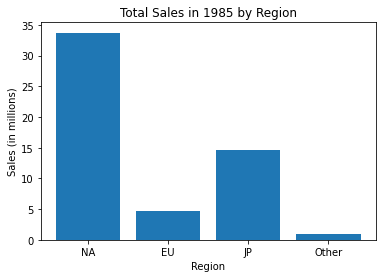

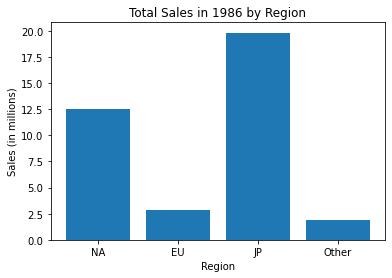

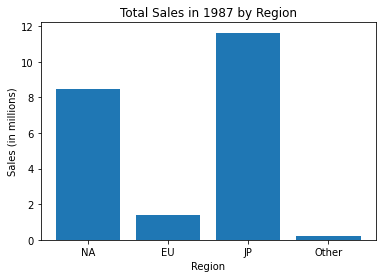

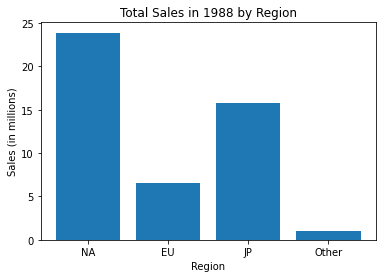

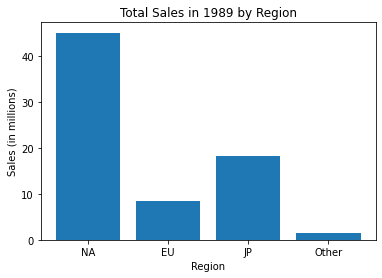

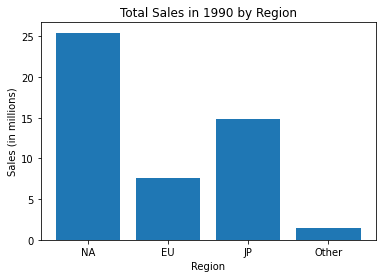

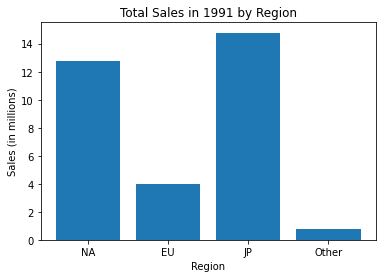

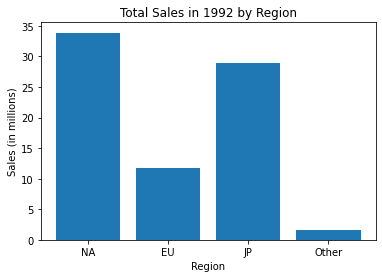

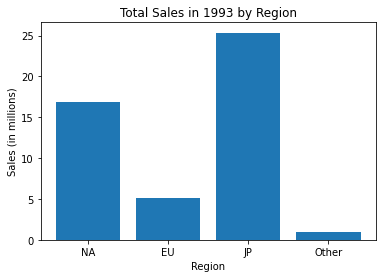

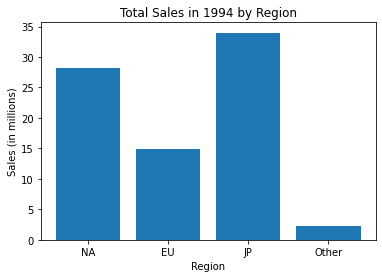

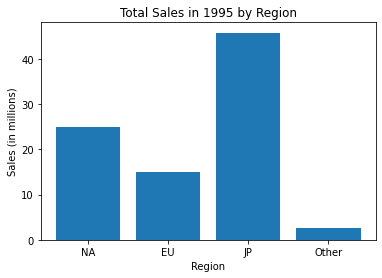

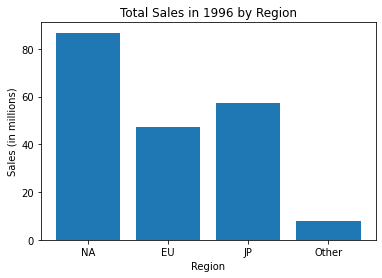

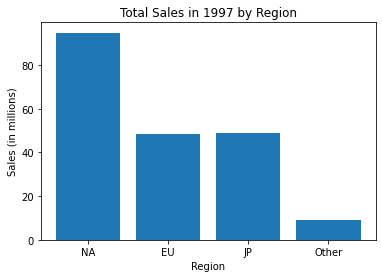

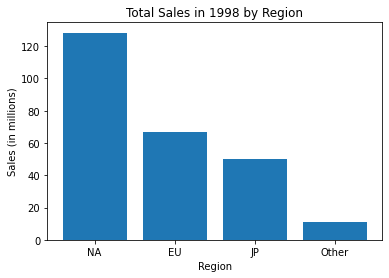

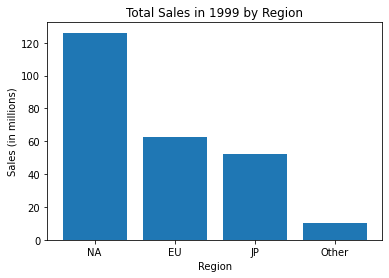

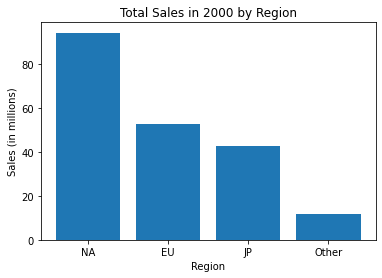

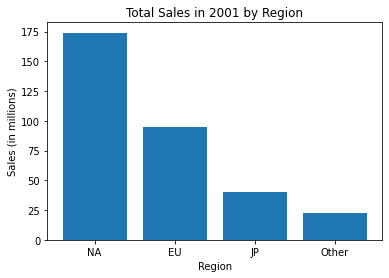

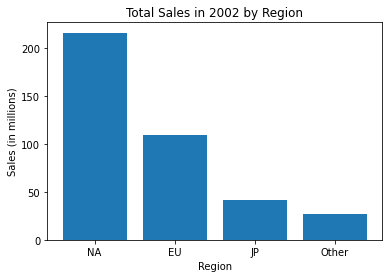

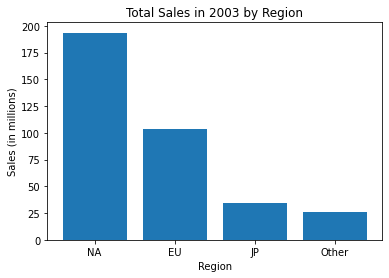

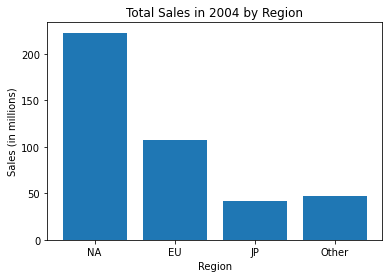

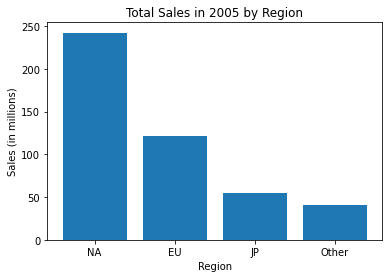

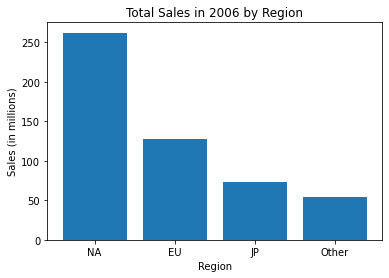

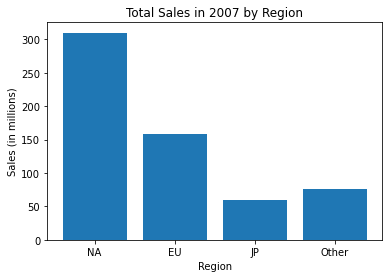

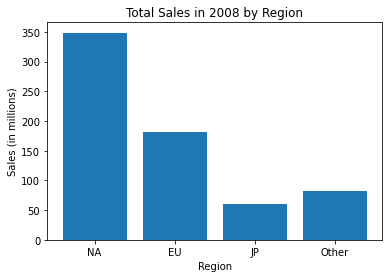

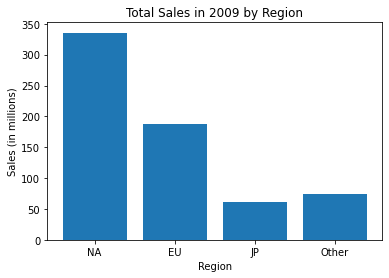

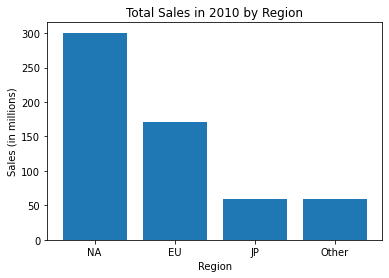

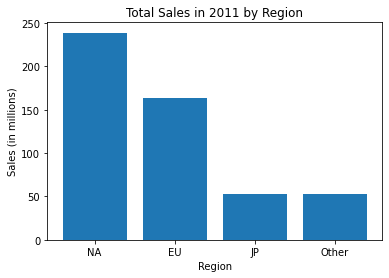

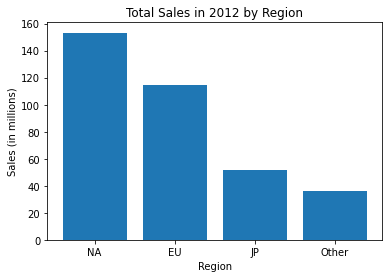

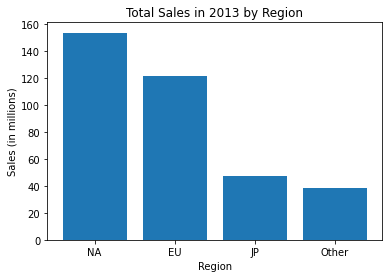

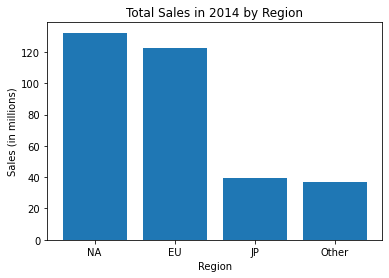

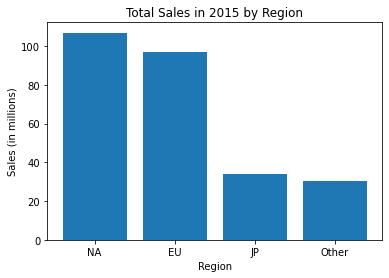

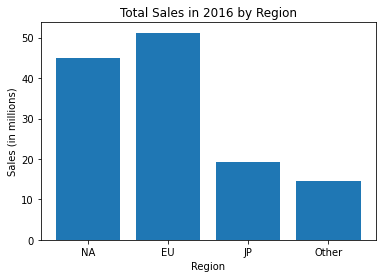

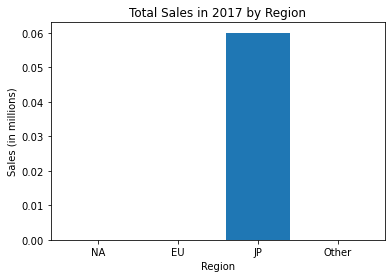

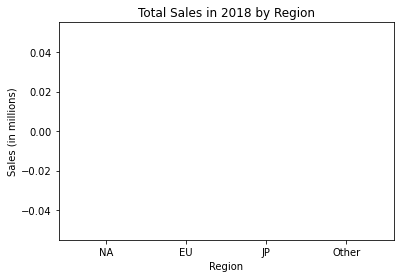

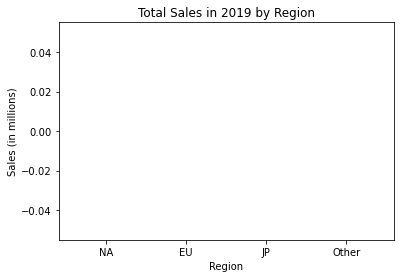

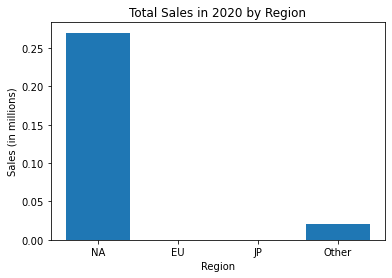

In [15]:
# Loop through each year from 1985 to 2020
for year in range(1985, 2021):

    # Create a dataframe for the current year
    df_year = vgsales.loc[vgsales['Year_of_Release'] == year]
    
    # Calculate the total sales for each region
    na_sales = df_year['NA_Sales'].sum()
    eu_sales = df_year['EU_Sales'].sum()
    jp_sales = df_year['JP_Sales'].sum()
    other_sales = df_year['Other_Sales'].sum()

    # Create a list of the total sales for each region
    sales = [na_sales, eu_sales, jp_sales, other_sales]

    # Create a list of the region names
    regions = ['NA', 'EU', 'JP', 'Other']

    # Create a bar chart with the total sales for each region
    plt.bar(regions, sales)

    # Add labels to the chart
    plt.title(f'Total Sales in {year} by Region')
    plt.xlabel('Region')
    plt.ylabel('Sales (in millions)')

    # Show the chart
    plt.show()

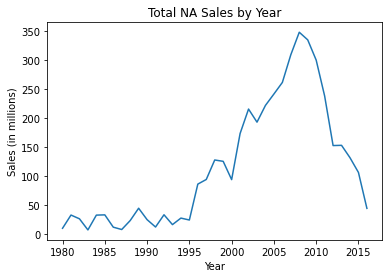

In [16]:
# Group the vgsales dataframe by Year_of_Release and calculate the sum of NA_Sales for each year
na_sales_sums = vgsales[vgsales['Year_of_Release'] <= 2016].groupby('Year_of_Release')['NA_Sales'].sum()

# Create a line chart of the NA sales sums by year
plt.plot(na_sales_sums.index, na_sales_sums.values)

# Add labels to the chart
plt.title('Total NA Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')

# Show the chart
plt.show()

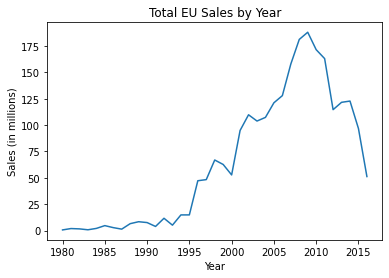

In [17]:
# Group the vgsales dataframe by Year_of_Release and calculate the sum of EU_Sales for each year
na_sales_sums = vgsales[vgsales['Year_of_Release'] <= 2016].groupby('Year_of_Release')['EU_Sales'].sum()

# Create a line chart of the EU sales sums by year
plt.plot(na_sales_sums.index, na_sales_sums.values)

# Add labels to the chart
plt.title('Total EU Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')

# Show the chart
plt.show()

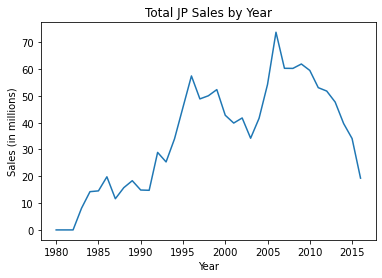

In [18]:
# Group the vgsales dataframe by Year_of_Release and calculate the sum of JP_Sales for each year
na_sales_sums = vgsales[vgsales['Year_of_Release'] <= 2016].groupby('Year_of_Release')['JP_Sales'].sum()

# Create a line chart of the JP sales sums by year
plt.plot(na_sales_sums.index, na_sales_sums.values)

# Add labels to the chart
plt.title('Total JP Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')

# Show the chart
plt.show()

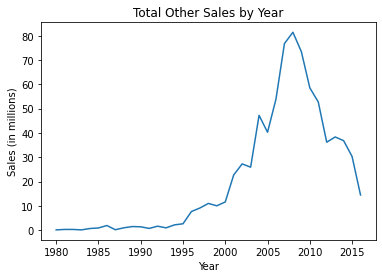

In [19]:
# Group the vgsales dataframe by Year_of_Release and calculate the sum of other_Sales for each year
na_sales_sums = vgsales[vgsales['Year_of_Release'] <= 2016].groupby('Year_of_Release')['Other_Sales'].sum()

# Create a line chart of the other sales sums by year
plt.plot(na_sales_sums.index, na_sales_sums.values)

# Add labels to the chart
plt.title('Total Other Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')

# Show the chart
plt.show()

In [20]:
#Up to this point is complete

In [21]:
na_sales_df = vgsales[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales']]
eu_sales_df = vgsales[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'EU_Sales']]
jp_sales_df = vgsales[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'JP_Sales']]
other_sales_df = vgsales[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Other_Sales']]

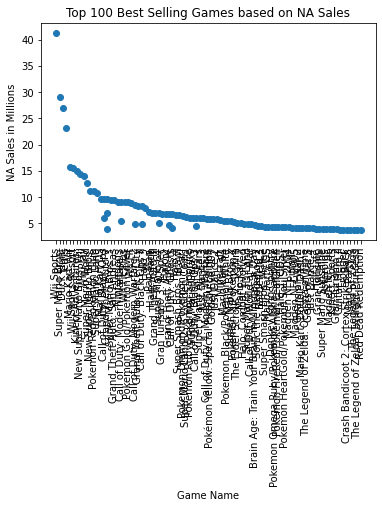

In [22]:
import matplotlib.pyplot as plt

# Sort the na_sales_df dataframe by 'NA_Sales' column in descending order and select the top 100 rows
top_100_na_sales = na_sales_df.sort_values('NA_Sales', ascending=False).head(100)

# Create a scatterplot
plt.scatter(x=top_100_na_sales['Name'], y=top_100_na_sales['NA_Sales'])
plt.title('Top 100 Best Selling Games based on NA Sales')
plt.xlabel('Game Name')
plt.ylabel('NA Sales in Millions')
plt.xticks(rotation=90)
plt.show()

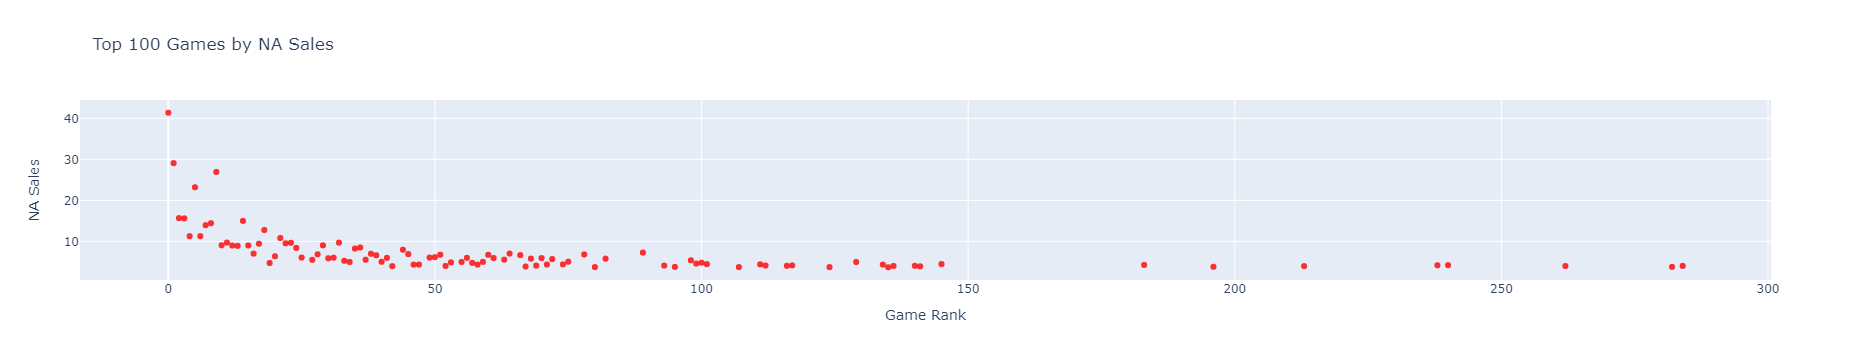

In [23]:
import plotly.graph_objs as go

na_sales_df_top100 = na_sales_df.sort_values(by=['NA_Sales'], ascending=False).head(100)

trace1 = go.Scatter(
    x = na_sales_df_top100.index,
    y = na_sales_df_top100['NA_Sales'],
    mode = "markers",
    name = "NA Sales",
    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
    text= na_sales_df_top100['Name']
)

layout = go.Layout(
    title=go.layout.Title(
        text='Top 100 Games by NA Sales'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Game Rank'
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='NA Sales'
        )
    )
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

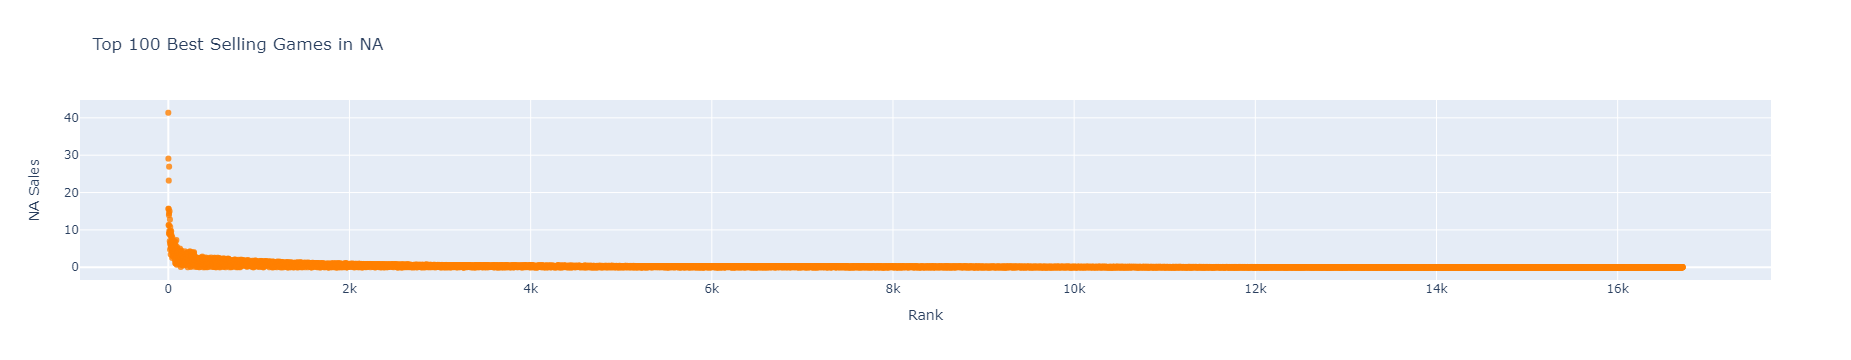

In [24]:
from plotly.offline import iplot
trace1 = go.Scatter(
                x = na_sales_df.index,
                y = na_sales_df['NA_Sales'],
                mode = "markers",
                name = "NA Sales",
                marker = dict(color = 'rgba(255, 128, 0, 0.8)'),
                text = na_sales_df['Name']
            )

data = [trace1]

layout = dict(title = 'Top 100 Best Selling Games in NA',
              xaxis = dict(title = 'Rank'),
              yaxis = dict(title = 'NA Sales'),
              hovermode = 'closest')

fig = dict(data=data, layout=layout)
iplot(fig)

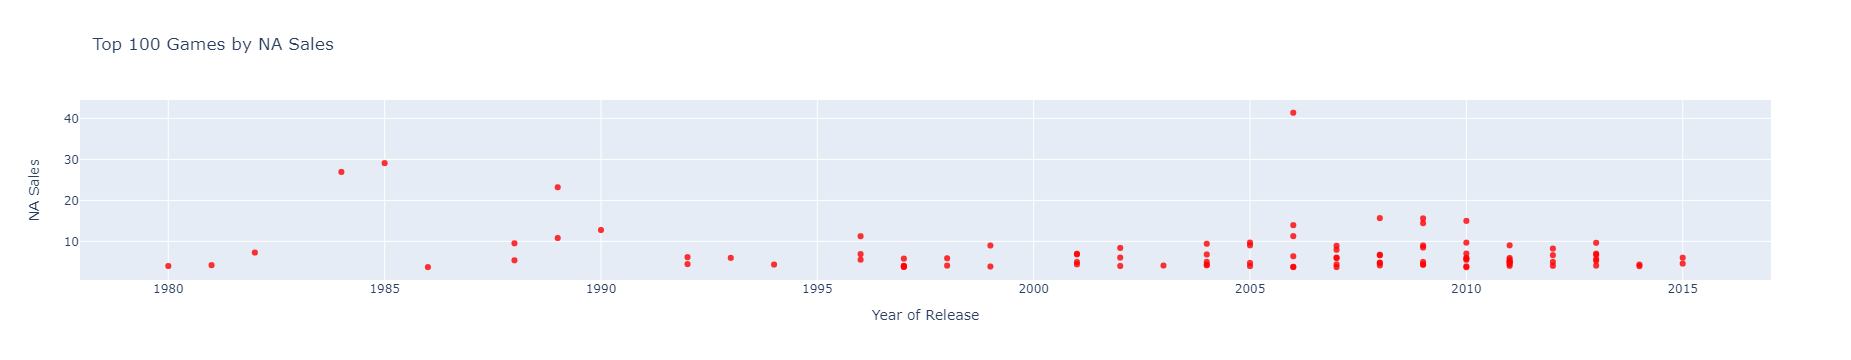

In [25]:
import plotly.graph_objs as go

na_sales_df_top100 = na_sales_df.sort_values(by=['NA_Sales'], ascending=False).head(100)

trace1 = go.Scatter(
    x = na_sales_df_top100['Year_of_Release'],
    y = na_sales_df_top100['NA_Sales'],
    mode = "markers",
    name = "NA Sales",
    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
    text= na_sales_df_top100['Name']
)

layout = go.Layout(
    title=go.layout.Title(
        text='Top 100 Games by NA Sales'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Year of Release'
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='NA Sales'
        )
    )
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

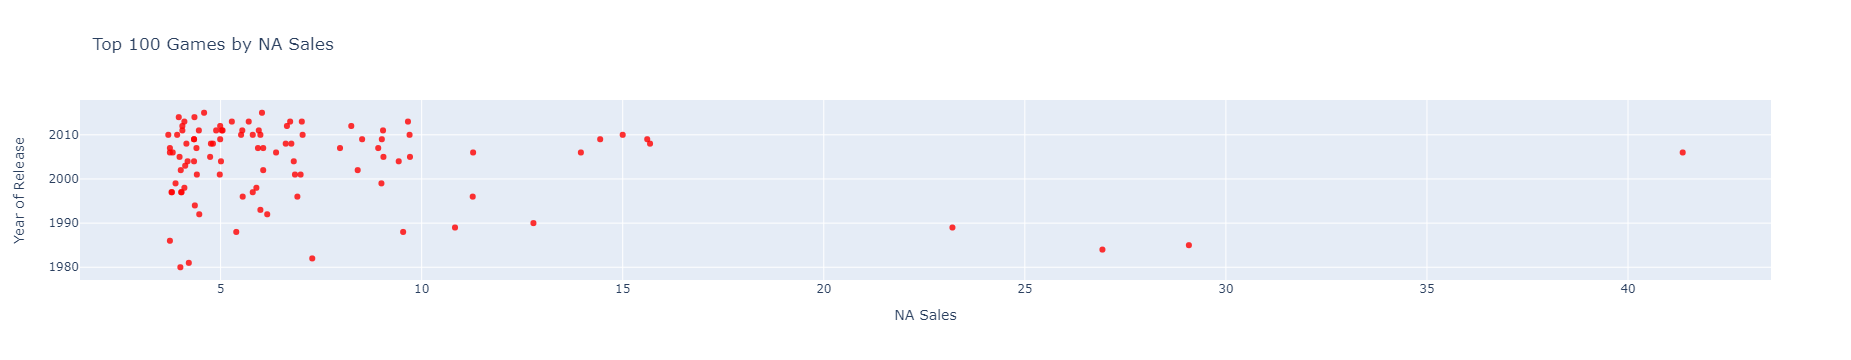

In [26]:
na_sales_df_top100 = na_sales_df.sort_values(by=['NA_Sales'], ascending=False).head(100)

trace1 = go.Scatter(
    x = na_sales_df_top100['NA_Sales'],
    y = na_sales_df_top100['Year_of_Release'],
    mode = "markers",
    name = "NA Sales",
    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
    text= na_sales_df_top100['Name']
)

layout = go.Layout(
    title=go.layout.Title(
        text='Top 100 Games by NA Sales'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='NA Sales'
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Year of Release'
        )
    )
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

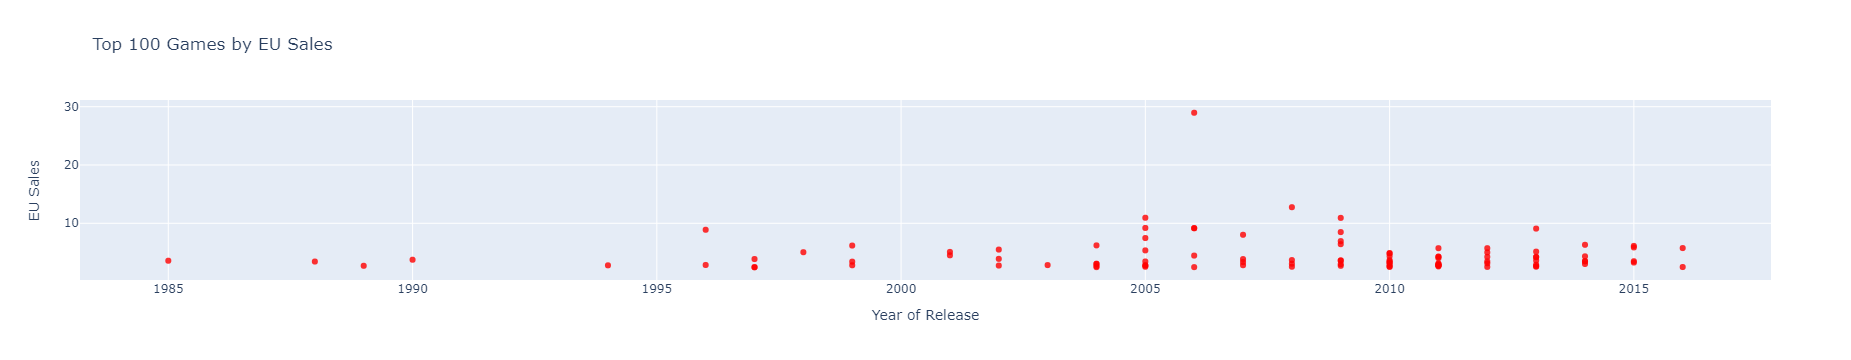

In [27]:
eu_sales_df_top100 = eu_sales_df.sort_values(by=['EU_Sales'], ascending=False).head(100)

trace1 = go.Scatter(
    x = eu_sales_df_top100['Year_of_Release'],
    y = eu_sales_df_top100['EU_Sales'],
    mode = "markers",
    name = "EU Sales",
    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
    text= eu_sales_df_top100['Name']
)

layout = go.Layout(
    title=go.layout.Title(
        text='Top 100 Games by EU Sales'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Year of Release'
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='EU Sales'
        )
    )
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

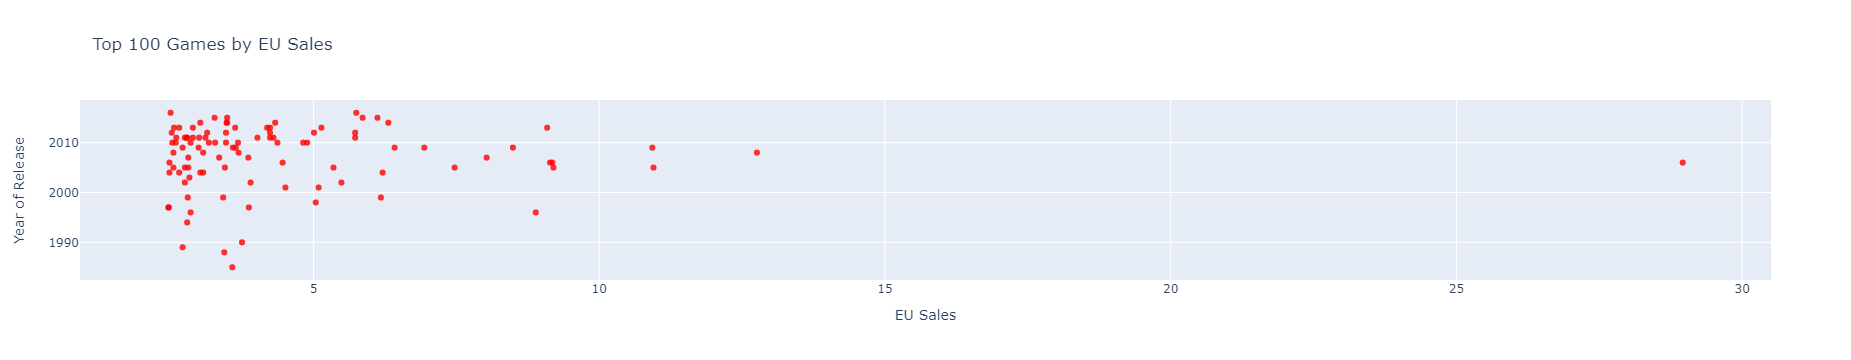

In [28]:
eu_sales_df_top100 = eu_sales_df.sort_values(by=['EU_Sales'], ascending=False).head(100)

trace1 = go.Scatter(
    x = eu_sales_df_top100['EU_Sales'],
    y = eu_sales_df_top100['Year_of_Release'],
    mode = "markers",
    name = "EU Sales",
    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
    text= eu_sales_df_top100['Name']
)

layout = go.Layout(
    title=go.layout.Title(
        text='Top 100 Games by EU Sales'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='EU Sales'
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Year of Release'
        )
    )
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

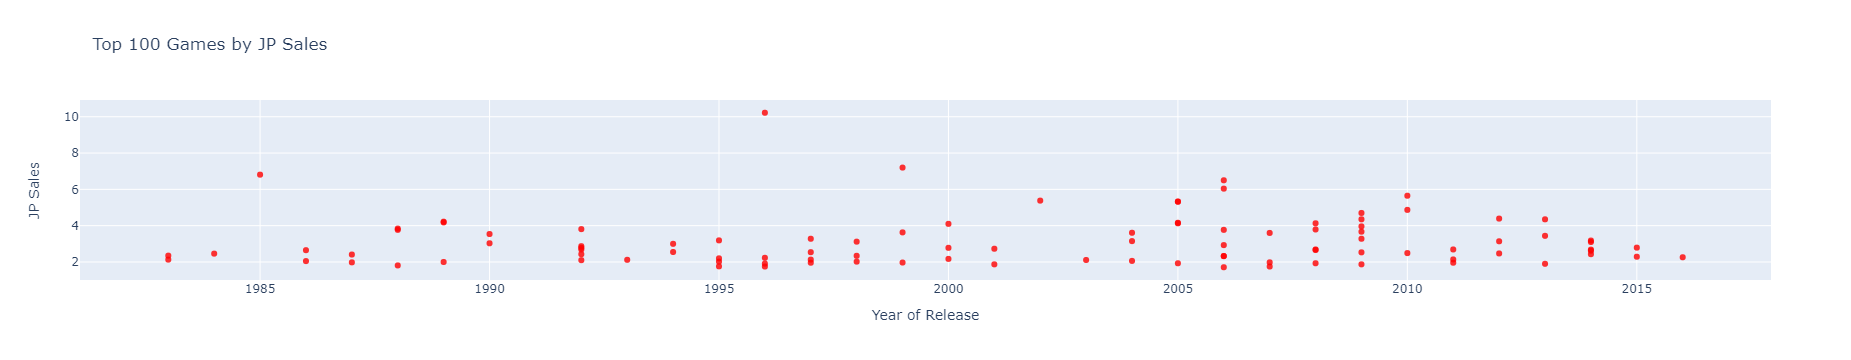

In [29]:
jp_sales_df_top100 = jp_sales_df.sort_values(by=['JP_Sales'], ascending=False).head(100)

trace1 = go.Scatter(
    x = jp_sales_df_top100['Year_of_Release'],
    y = jp_sales_df_top100['JP_Sales'],
    mode = "markers",
    name = "JP Sales",
    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
    text= jp_sales_df_top100['Name']
)

layout = go.Layout(
    title=go.layout.Title(
        text='Top 100 Games by JP Sales'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Year of Release'
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='JP Sales'
        )
    )
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

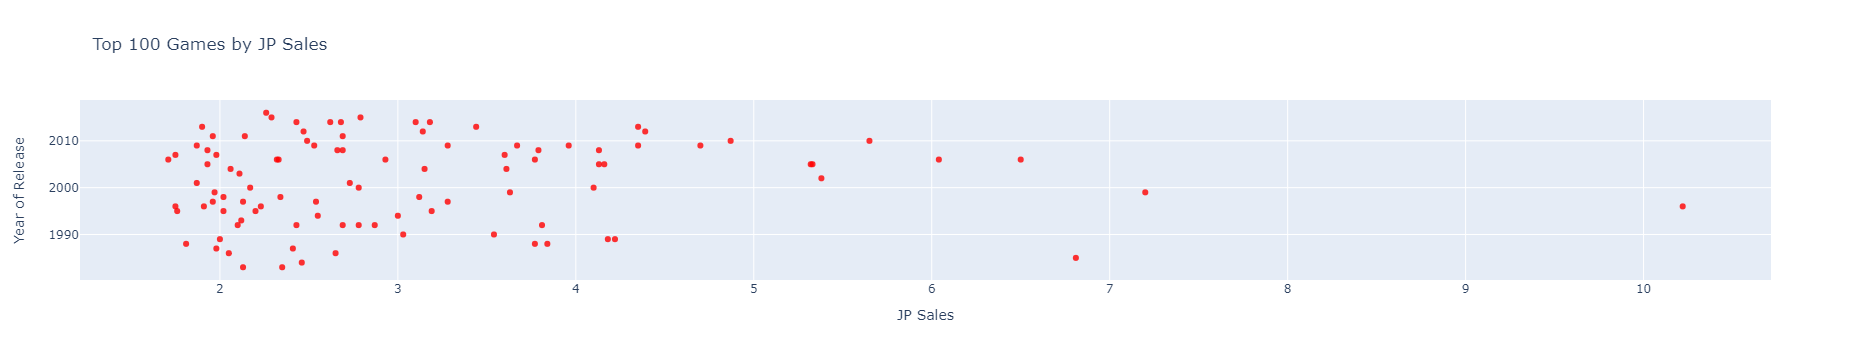

In [30]:
jp_sales_df_top100 = jp_sales_df.sort_values(by=['JP_Sales'], ascending=False).head(100)

trace1 = go.Scatter(
    x = jp_sales_df_top100['JP_Sales'],
    y = jp_sales_df_top100['Year_of_Release'],
    mode = "markers",
    name = "JP Sales",
    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
    text= jp_sales_df_top100['Name']
)

layout = go.Layout(
    title=go.layout.Title(
        text='Top 100 Games by JP Sales'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='JP Sales'
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Year of Release'
        )
    )
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

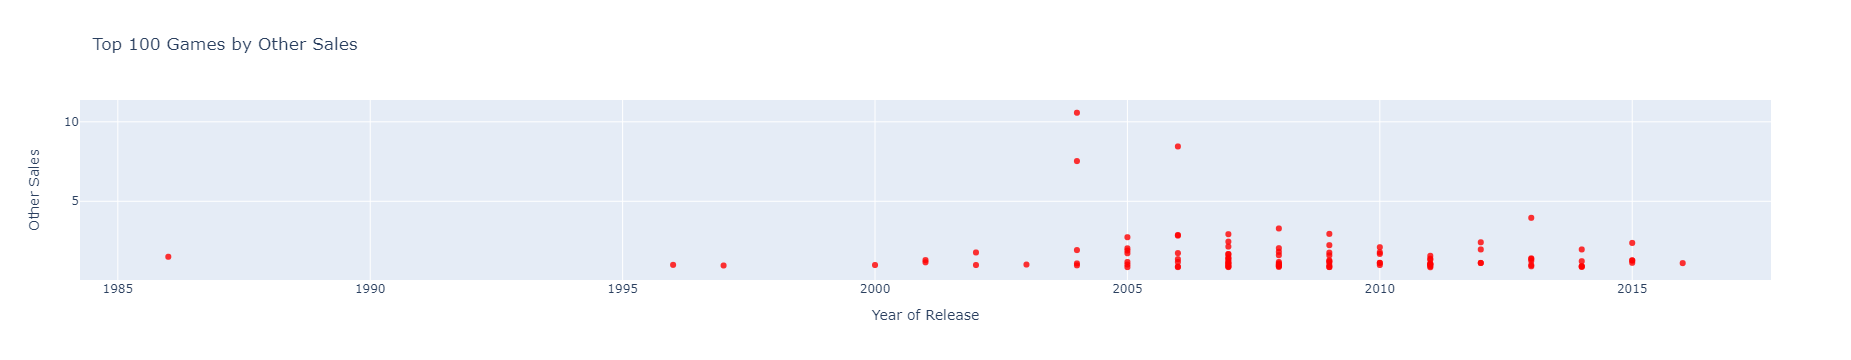

In [31]:
other_sales_df_top100 = other_sales_df.sort_values(by=['Other_Sales'], ascending=False).head(100)

trace1 = go.Scatter(
    x = other_sales_df_top100['Year_of_Release'],
    y = other_sales_df_top100['Other_Sales'],
    mode = "markers",
    name = "JP Sales",
    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
    text= other_sales_df_top100['Name']
)

layout = go.Layout(
    title=go.layout.Title(
        text='Top 100 Games by Other Sales'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Year of Release'
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Other Sales'
        )
    )
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

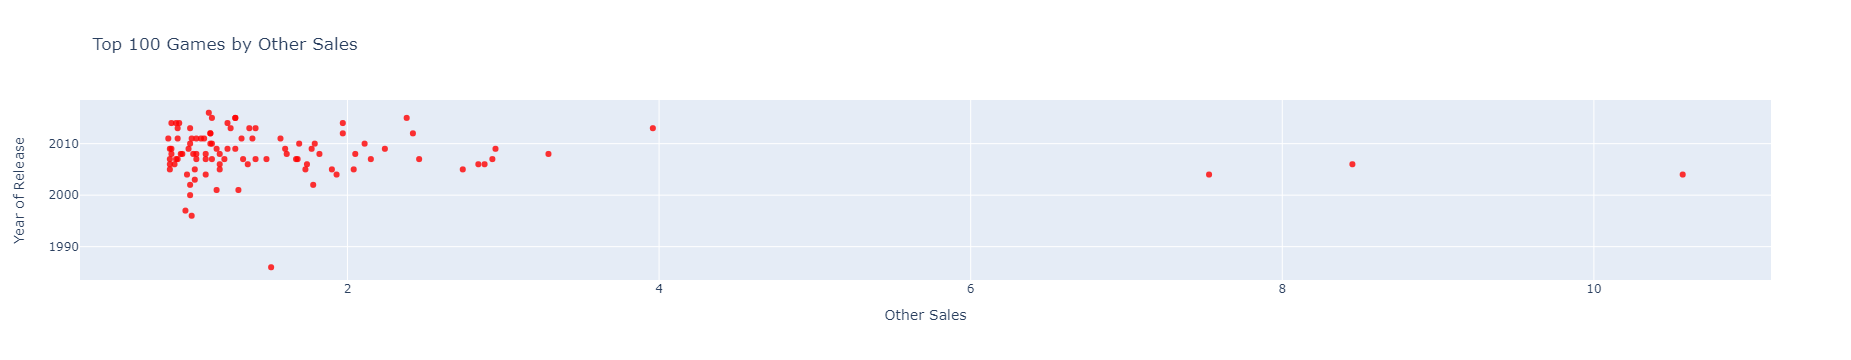

In [32]:
other_sales_df_top100 = other_sales_df.sort_values(by=['Other_Sales'], ascending=False).head(100)

trace1 = go.Scatter(
    x = other_sales_df_top100['Other_Sales'],  # flipped x and y axes
    y = other_sales_df_top100['Year_of_Release'],  # flipped x and y axes
    mode = "markers",
    name = "JP Sales",
    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
    text= other_sales_df_top100['Name']
)

layout = go.Layout(
    title=go.layout.Title(
        text='Top 100 Games by Other Sales'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Other Sales'  # updated x-axis title
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Year of Release'  # updated y-axis title
        )
    )
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

In [33]:
vgsales['Total Sales'] = vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

In [34]:
vgsales

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  \
0          Nintendo     41.36     28.96      3.77         8.45          76.0   
1          Nintendo     29.08      3.58      6.81         0.77           NaN   
2          Nintendo     15.68     12.76      3.79         3.29          82.0   
3          Nintendo     15.61     10.93      3.28         2.95          80.0   
4          Nintendo     11.27      8.89     10.22         1.00           NaN   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00           NaN   
16715   Codemasters      0.00      0.01      0.00         0.00           NaN   
16716  Idea Factory      0.00      0.00      0.01         0.00           NaN   
16717       Wanadoo      0.01      0.00      0.00         0.00           NaN   
16718    Tecmo Koei      0.00      0.00      0.01         0.00           NaN   

       Critic_Count  User_Count Developer Rating  Total Sales  
0              51.0       322.0  Nintendo      E        82.54  
1               NaN         NaN       NaN    NaN        40.24  
2              73.0       709.0  Nintendo      E        35.52  
3              73.0       192.0  Nintendo      E        32.77  
4               NaN         NaN       NaN    NaN        31.38  
...             ...         ...       ...    ...          ...  
16714           NaN         NaN       NaN    NaN         0.01  
16715           NaN         NaN       NaN    NaN         0.01  
16716           NaN         NaN       NaN    NaN         0.01  
16717           NaN         NaN       NaN    NaN         0.01  
16718           NaN         NaN       NaN    NaN         0.01  

[16719 rows x 15 columns]

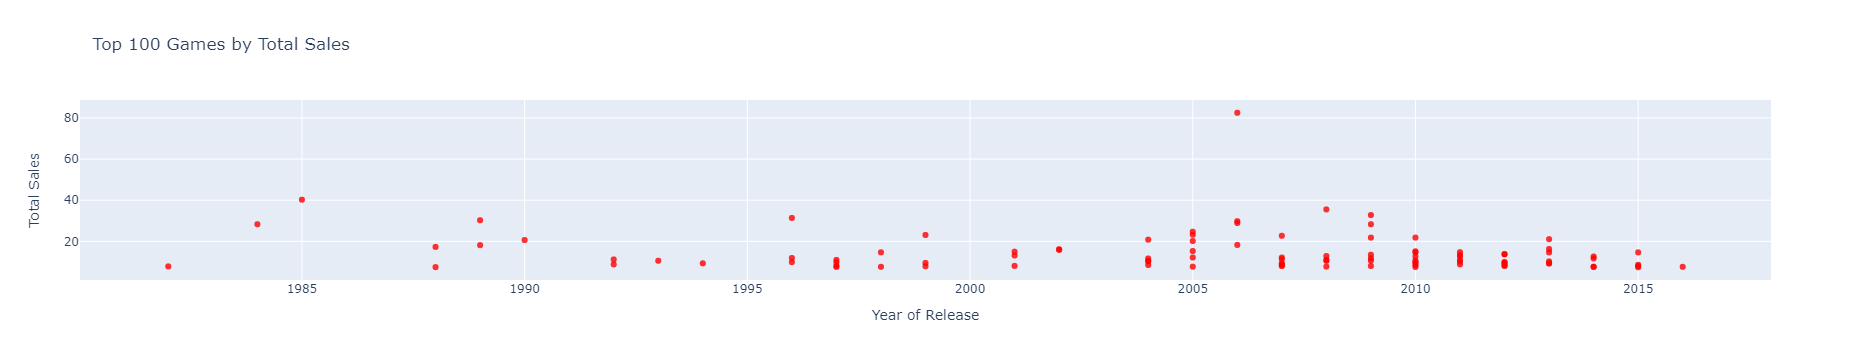

In [35]:
total_sales_df_top100 = vgsales.sort_values(by=['Total Sales'], ascending=False).head(100)

trace1 = go.Scatter(
    x = total_sales_df_top100['Year_of_Release'],
    y = total_sales_df_top100['Total Sales'],
    mode = "markers",
    name = "Total Sales",
    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
    text= total_sales_df_top100['Name']
)

layout = go.Layout(
    title=go.layout.Title(
        text='Top 100 Games by Total Sales'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Year of Release'
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Total Sales'
        )
    )
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

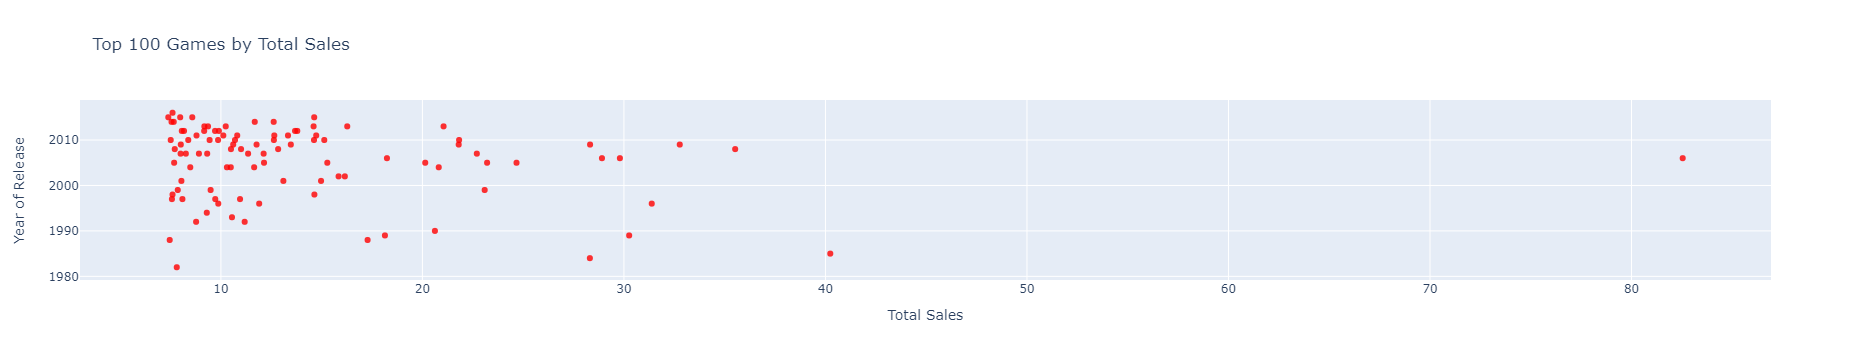

In [36]:
total_sales_df_top100 = vgsales.sort_values(by=['Total Sales'], ascending=False).head(100)

trace1 = go.Scatter(
    x = total_sales_df_top100['Total Sales'],
    y = total_sales_df_top100['Year_of_Release'],
    mode = "markers",
    name = "Total Sales",
    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
    text= total_sales_df_top100['Name']
)

layout = go.Layout(
    title=go.layout.Title(
        text='Top 100 Games by Total Sales'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Total Sales'
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Year of Release'
        )
    )
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

In [37]:
#Up to this point is complete

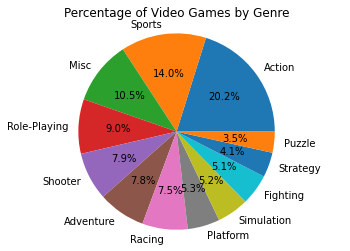

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the count of each genre and store it in a new DataFrame
genres_count = vgsales["Genre"].value_counts().reset_index()

# Rename the columns of the new DataFrame
genres_count.columns = ["Genre", "Count"]

# Create a pie chart of the count of each genre
plt.pie(genres_count["Count"], labels=genres_count["Genre"], autopct="%1.1f%%")
plt.axis("equal")
plt.title("Percentage of Video Games by Genre")
plt.show()

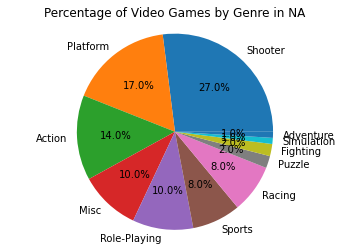

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the count of each genre and store it in a new DataFrame
genres_count = na_sales_df_top100["Genre"].value_counts().reset_index()

# Rename the columns of the new DataFrame
genres_count.columns = ["Genre", "Count"]

# Create a pie chart of the count of each genre
plt.pie(genres_count["Count"], labels=genres_count["Genre"], autopct="%1.1f%%")
plt.axis("equal")
plt.title("Percentage of Video Games by Genre in NA")
plt.show()

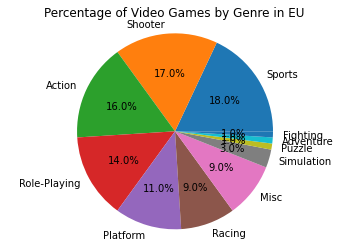

In [40]:
# Get the count of each genre and store it in a new DataFrame
genres_count = eu_sales_df_top100["Genre"].value_counts().reset_index()

# Rename the columns of the new DataFrame
genres_count.columns = ["Genre", "Count"]

# Create a pie chart of the count of each genre
plt.pie(genres_count["Count"], labels=genres_count["Genre"], autopct="%1.1f%%")
plt.axis("equal")
plt.title("Percentage of Video Games by Genre in EU")
plt.show()

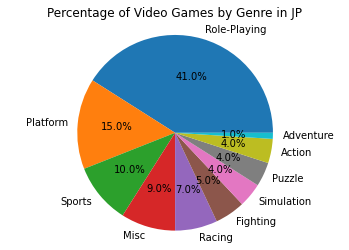

In [41]:
# Get the count of each genre and store it in a new DataFrame
genres_count = jp_sales_df_top100["Genre"].value_counts().reset_index()

# Rename the columns of the new DataFrame
genres_count.columns = ["Genre", "Count"]

# Create a pie chart of the count of each genre
plt.pie(genres_count["Count"], labels=genres_count["Genre"], autopct="%1.1f%%")
plt.axis("equal")
plt.title("Percentage of Video Games by Genre in JP")
plt.show()

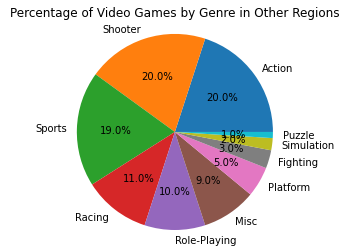

In [42]:
# Get the count of each genre and store it in a new DataFrame
genres_count = other_sales_df_top100["Genre"].value_counts().reset_index()

# Rename the columns of the new DataFrame
genres_count.columns = ["Genre", "Count"]

# Create a pie chart of the count of each genre
plt.pie(genres_count["Count"], labels=genres_count["Genre"], autopct="%1.1f%%")
plt.axis("equal")
plt.title("Percentage of Video Games by Genre in Other Regions")
plt.show()

In [43]:
vgsales['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

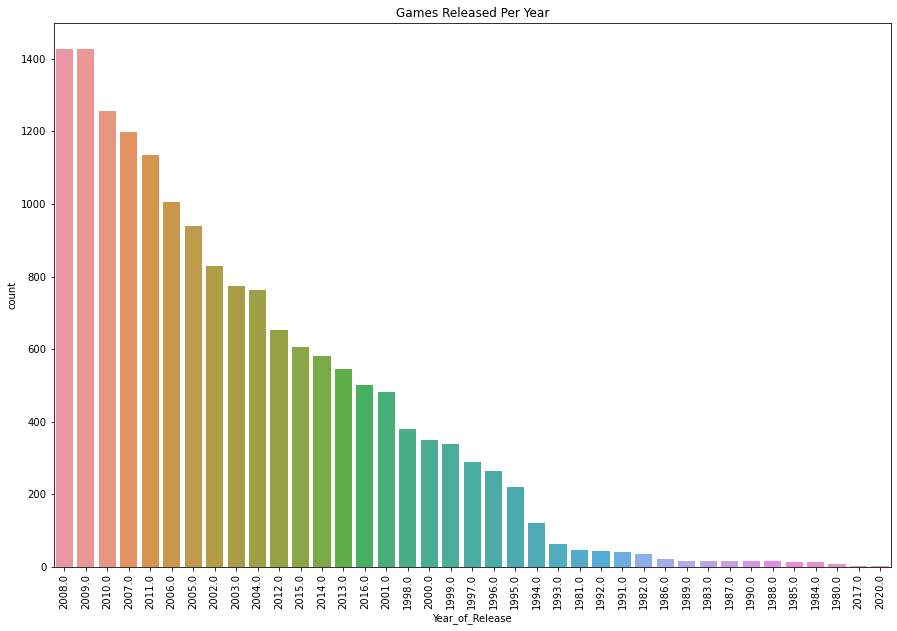

In [44]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year_of_Release", data=vgsales, order = vgsales.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title("Games Released Per Year")
plt.show()

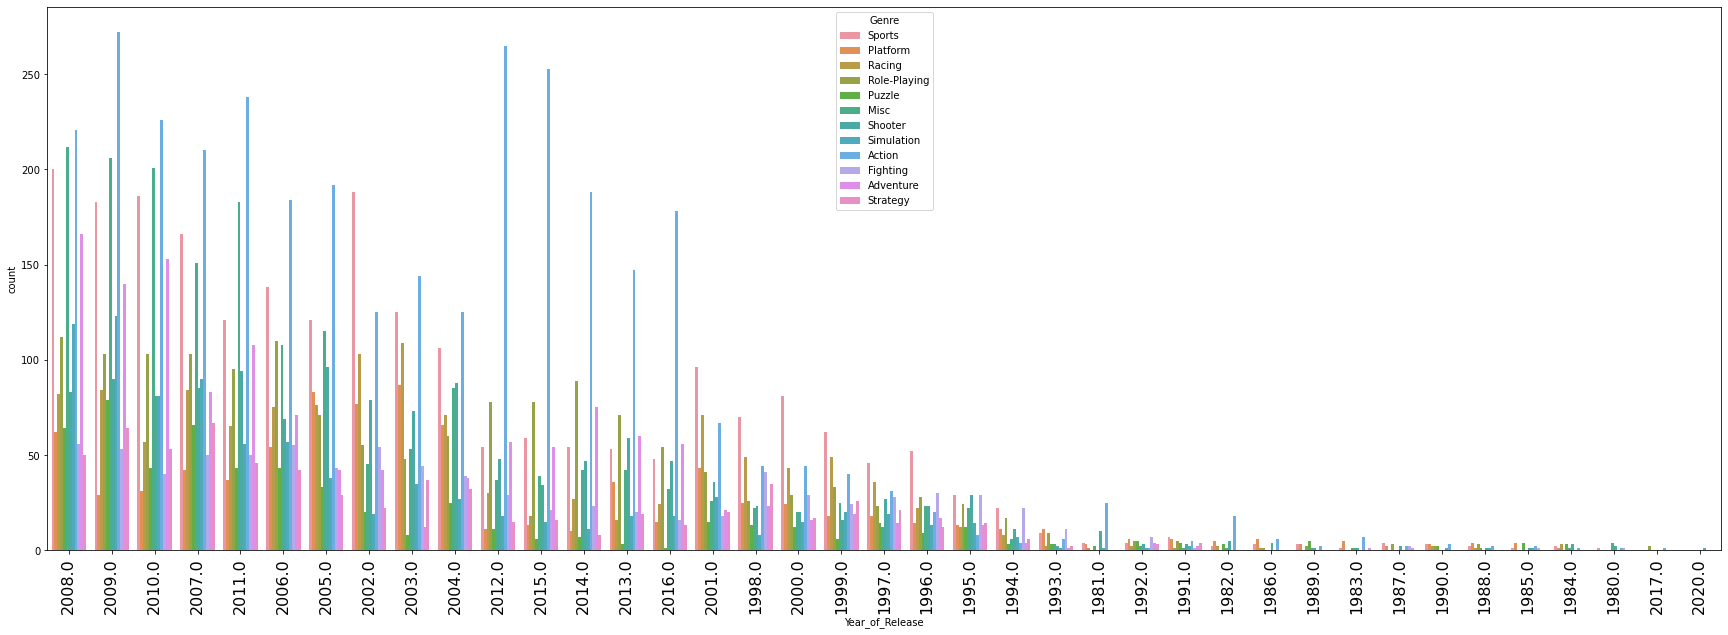

In [45]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year_of_Release", data=vgsales, order = vgsales.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=False).index, hue='Genre')
plt.xticks(size=16, rotation=90)
plt.show()

In [46]:
genres_count

Genre  Count
0        Action     20
1       Shooter     20
2        Sports     19
3        Racing     11
4  Role-Playing     10
5          Misc      9
6      Platform      5
7      Fighting      3
8    Simulation      2
9        Puzzle      1

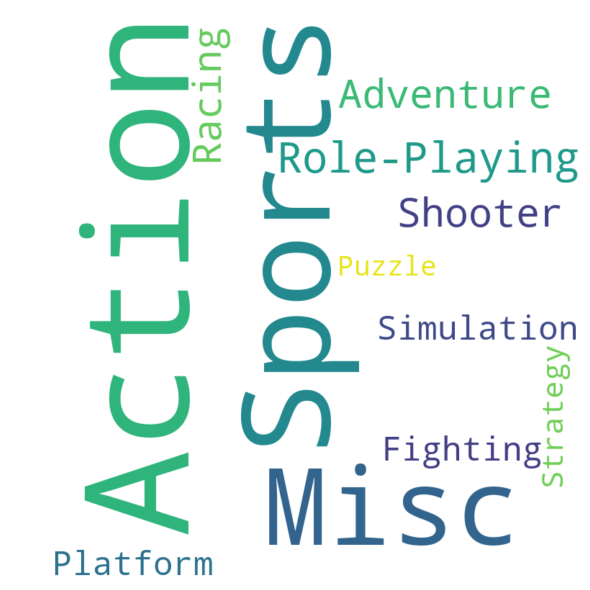

In [47]:
# Define the genres count dictionary/ was having a error with the value types so instead of using decimals I just multipled the value by 100 to achive the same results
genres_count = pd.Series({'Action': '202', 'Sports': '140', 'Misc': '105','Role-Playing': '90', 'Shooter': '79', 'Adventure': '78','Racing': '75', 'Platform': '53', 'Simulation': '52','Fighting': '51', 'Strategy': '41', 'Puzzle': '35'})

# Convert the values in the dictionary to integers
word_frequencies = {key: int(value) for key, value in genres_count.items()}

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white')

# Generate the word cloud from the word frequencies dictionary
wordcloud.generate_from_frequencies(word_frequencies)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()